# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [68]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [ ]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')


The data columns are all floats except for the activity label.

In [113]:
data.dtypes.value_counts()
data

,lr,l1,l2
0,-0.057452,-0.048872,-0.086451
1,-0.054928,-0.013605,-0.059324
2,-0.205621,-0.027646,-0.238380
3,0.392420,0.709090,0.509880
4,0.215570,0.148721,0.247841
5,0.161632,0.126807,0.202012
6,0.218640,0.215741,0.283789
7,0.191759,0.114602,0.210372
8,0.165447,0.175776,0.209972
9,0.392294,1.883637,0.495509


In [71]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [72]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [73]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [74]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

4856    5
1141    5
5622    4
4769    0
1849    3
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [83]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()   # it will give you a matrix(table) of correlation between the datas

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)    # getting the indices of data
# print(tril_index)
# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
## till now it created a matrix of correlation for different correlation with a NaN Value
        
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))
#print(corr_values)
# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

                                    feature1  \
0                          tBodyAcc-mean()-X   
1                          tBodyAcc-mean()-X   
2                          tBodyAcc-mean()-X   
3                          tBodyAcc-mean()-X   
4                          tBodyAcc-mean()-X   
5                          tBodyAcc-mean()-X   
6                          tBodyAcc-mean()-X   
7                          tBodyAcc-mean()-X   
8                          tBodyAcc-mean()-X   
9                          tBodyAcc-mean()-X   
10                         tBodyAcc-mean()-X   
11                         tBodyAcc-mean()-X   
12                         tBodyAcc-mean()-X   
13                         tBodyAcc-mean()-X   
14                         tBodyAcc-mean()-X   
15                         tBodyAcc-mean()-X   
16                         tBodyAcc-mean()-X   
17                         tBodyAcc-mean()-X   
18                         tBodyAcc-mean()-X   
19                         tBodyAcc-mean

A histogram of the absolute value correlations.

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

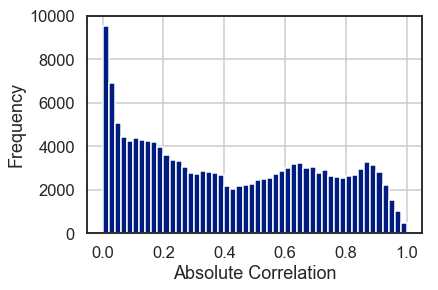

In [78]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [79]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
92472,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
156049,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.000000,1.000000
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
95667,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.000000,1.000000


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [59]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [65]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [94]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)

In [106]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga',multi_class='multinomial',max_iter=100).fit(X_train, y_train)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was

In [63]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

In [107]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2',multi_class='multinomial',max_iter = 1000).fit(X_train, y_train)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [110]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.


lr                                                          l1  \
            0         1         2         3         4         5         0   
221 -0.022539  0.137386 -0.325261  0.049694  0.112405  0.048315  0.015884   
475  0.001315 -0.019242  0.011286 -0.223366  0.055696  0.174312 -0.054554   
408 -0.007506 -0.015220 -0.018772  0.073971  0.006466 -0.038939 -0.070760   
552 -0.088198  0.516265 -0.186387  0.298383 -0.629050  0.088986 -0.233771   
367 -0.137458 -0.201670 -0.145939  0.459928  0.019958  0.005181 -0.060461   
547 -0.002299 -0.019423  0.013010 -0.008425  0.051925 -0.034787 -0.061668   
482 -0.003627 -0.071975  0.013791  0.152709 -0.180538  0.089640 -0.041145   
61   0.036504  0.041663  0.308923 -0.277715  0.055518 -0.164892 -0.001593   
169 -0.042922 -0.176796  0.119874  0.023486 -0.312015  0.388373 -0.053059   
309  0.016266 -0.029434 -0.002167 -0.106044  0.026386  0.094993 -0.024114   

                                                             l2            \
            1         2         3         4         5         0         1   
221 -0.063246 -0.730566 -0.001146  0.117382  0.010523  0.000623  0.144658   
475 -0.005879  0.145368 -0.125916 -0.002661  0.090055 -0.014701 -0.021911   
408  0.007516  0.052373  0.043967  0.010779 -0.076759 -0.023557 -0.010075   
552  1.270758 -0.403597  0.295043 -1.272285  0.019709 -0.147463  0.853463   
367  0.016106 -0.455714  1.257694 -0.001603  0.000914 -0.146842 -0.189833   
547 -0.002675  0.139292 -0.007229  0.015452 -0.024684 -0.019222 -0.015829   
482 -0.066622  0.138474  0.078072 -0.245024  0.107270 -0.017572 -0.103076   
61   0.057913  0.377387 -0.201190  0.032960 -0.119073  0.012377  0.111598   
169 -0.113488  0.159929  0.015933 -0.605164  0.688216 -0.061603 -0.231909   
309 -0.018369  0.113876 -0.084628 -0.018244  0.081941  0.003049 -0.041705   

                                             
            2         3         4         5  
221 -0.386703  0.054603  0.128339  0.058481  
475  0.033127 -0.297622  0.074134  0.226974  
408 -0.010597  0.079711  0.008434 -0.043915  
552 -0.398969  0.358722 -0.753900  0.088147  
367 -0.228565  0.569094  0.007354 -0.011208  
547  0.029079 -0.011590  0.054485 -0.036923  
482  0.045698  0.171632 -0.209583  0.112900  
61   0.375879 -0.379341  0.097391 -0.217903  
169  0.180795  0.008858 -0.384842  0.488702  
309  0.021562 -0.133115  0.028493  0.121716

Prepare six separate plots for each of the multi-class coefficients.

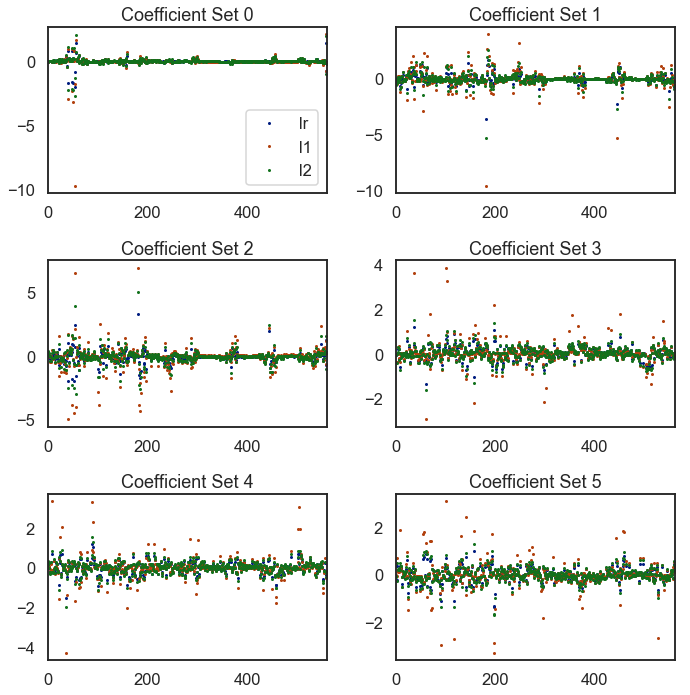

In [111]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [159]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred



ValueError: X has 561 features per sample; expecting 50

In [115]:
y_prob.head()

,lr,l1,l2
0,0.999987,1.000000,0.999998
1,0.998361,0.999990,0.999656
2,0.996546,0.999937,0.998871
3,0.990812,0.999871,0.997829
4,0.998089,0.999819,0.999294


## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [116]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [117]:
#Run the metrics
metrics

,lr,l1,l2
precision,0.983811,0.984784,0.983485
recall,0.983819,0.984790,0.983495
fscore,0.983811,0.984782,0.983488
accuracy,0.983819,0.984790,0.983495
auc,0.990184,0.990749,0.989983


## Question 8

Display or plot the confusion matrix for each model.

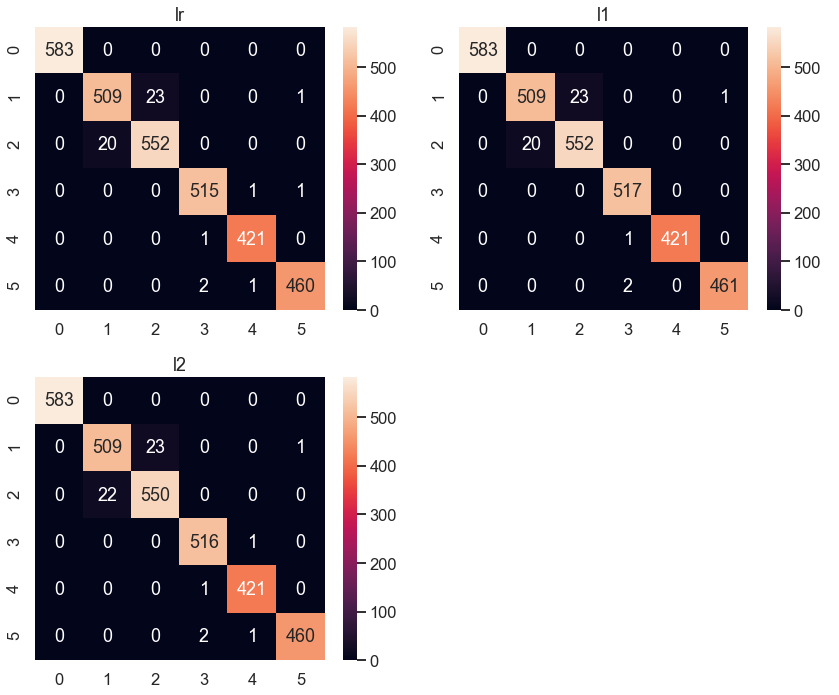

In [118]:

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()


## Question 9
 Identify highly correlated columns and drop those columns before building models

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))


data_y = pd.concat([y_train,y_test])

from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(data_y)

 Repeat Model building with new training data after removing higly correlated columns

In [121]:
# Try standard, L1 and L2 Logistic regression
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr_new = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_new, Y_new)

In [124]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1_new = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga',multi_class='multinomial',max_iter=100).fit(X_new, Y_new)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was

In [155]:
# L2 regularized logistic regression
lr_l2_new = LogisticRegressionCV(Cs=10, cv=4, penalty='l2',multi_class='multinomial',max_iter = 1000).fit(X_new, Y_new)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [152]:
# Combine all the coefficients into a dataframe for comparison
coefficients_new = list()

coeff_labels_new = ['lr', 'l1', 'l2']
coeff_models_new = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels_new, coeff_models_new):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients_new.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients_new = pd.concat(coefficients_new, axis=1)

coefficients_new.tail(10)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.


lr                            l1                                          \
      0   1   2   3   4   5         0         1         2         3         4   
551 NaN NaN NaN NaN NaN NaN  0.090967 -0.788324  0.467770 -0.222677  0.239928   
552 NaN NaN NaN NaN NaN NaN -0.233771  1.270758 -0.403597  0.295043 -1.272285   
553 NaN NaN NaN NaN NaN NaN -0.270708 -0.176687  0.666953  0.005771 -0.986080   
554 NaN NaN NaN NaN NaN NaN -0.026006  0.366217 -0.291260 -0.039910 -0.164474   
555 NaN NaN NaN NaN NaN NaN  0.102314 -0.427980  0.159953  0.048279 -0.258974   
556 NaN NaN NaN NaN NaN NaN -0.157527 -0.086299  0.719539 -0.058046  0.483843   
557 NaN NaN NaN NaN NaN NaN -0.015189 -0.537007  0.551954 -0.068971 -0.127472   
558 NaN NaN NaN NaN NaN NaN  2.105670 -0.447883 -0.610439 -0.063983 -0.486996   
559 NaN NaN NaN NaN NaN NaN -0.771366 -0.188762  1.177288 -0.036569 -0.140364   
560 NaN NaN NaN NaN NaN NaN -0.056739 -0.163319  0.297771  0.039329 -0.148077   

                     l2                                                    
            5         0         1         2         3         4         5  
551  0.018412  0.001358 -0.390902  0.280236 -0.206638  0.368919 -0.052973  
552  0.019709 -0.147463  0.853463 -0.398969  0.358722 -0.753900  0.088147  
553  0.125342 -0.156086 -0.144923  0.592074  0.138752 -0.631447  0.201630  
554  0.226509 -0.086846  0.169324 -0.107580  0.037471 -0.145688  0.133319  
555  0.096557  0.090379 -0.165489  0.198669  0.030192 -0.154255  0.000504  
556 -0.156284 -0.127887 -0.247311  0.382918 -0.164775  0.293653 -0.136598  
557  0.339470 -0.010441 -0.279898  0.328976 -0.097343 -0.162947  0.221652  
558  0.560714  1.931897 -0.894500 -0.972450 -0.203489 -0.438158  0.576701  
559  0.376924 -1.001965 -0.654466  1.606363 -0.113441 -0.268366  0.431875  
560  0.113738 -0.255564 -0.200796  0.372533  0.078251 -0.214497  0.220073

Prepare six separate plots for each of the multi-class coefficients.

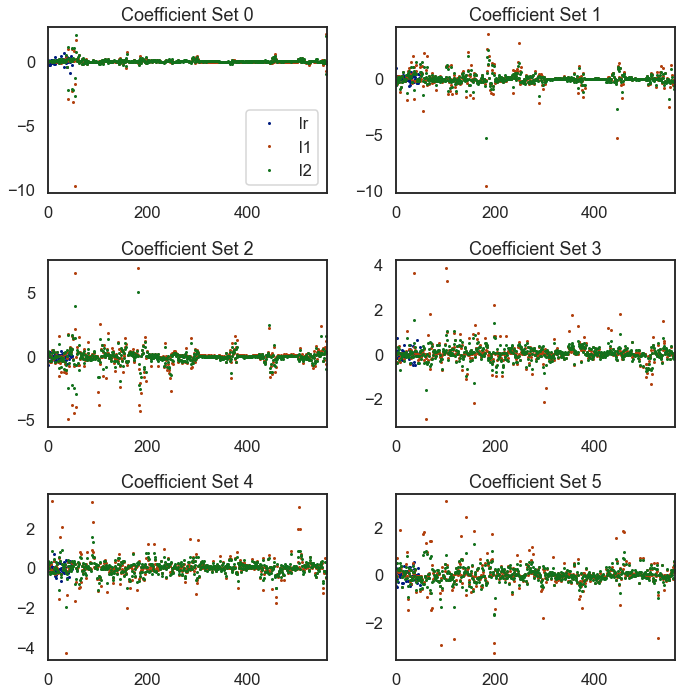

In [129]:
# try the plots
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients_new.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()



## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [157]:
# Predict the class and the probability for each

y_pred_new = list()
y_prob_new = list()

coeff_labels_new = ['lr', 'l1', 'l2']
coeff_models_new = [lr_new, lr_l1_new, lr_l2_new]

for lab,mod in zip(coeff_labels_new, coeff_models_new):
    y_pred_new.append(pd.Series(mod.predict(X_test_new), name=lab))
    y_prob_new.append(pd.Series(mod.predict_proba(X_test_new).max(axis=1), name=lab))
    
y_pred_new = pd.concat(y_pred_new, axis=1)
y_prob_new = pd.concat(y_prob_new, axis=1)

y_pred_new.head()


,lr,l1,l2
0,0,0,0
1,0,0,2
2,1,0,2
3,2,0,0
4,0,0,0


## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [164]:
# Calculate the error metrics as listed above

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics_new = list()
cm_new = dict()

for lab in coeff_labels_new:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(Y_test_new, y_pred_new[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(Y_test_new, y_pred_new[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(Y_test_new, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred_new[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_new[lab] = confusion_matrix(Y_test_new, y_pred_new[lab])
    
    metrics_new.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics_new = pd.concat(metrics_new, axis=1)

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/MAHDI/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
#Run the metrics
metrics_new

,lr,l1,l2
precision,0.175874,0.034315,0.067887
recall,0.180583,0.185243,0.185631
fscore,0.150576,0.057904,0.097046
accuracy,0.180583,0.185243,0.185631
auc,0.501241,0.500000,0.500785


## Question 13

Display or plot the confusion matrix for each model.

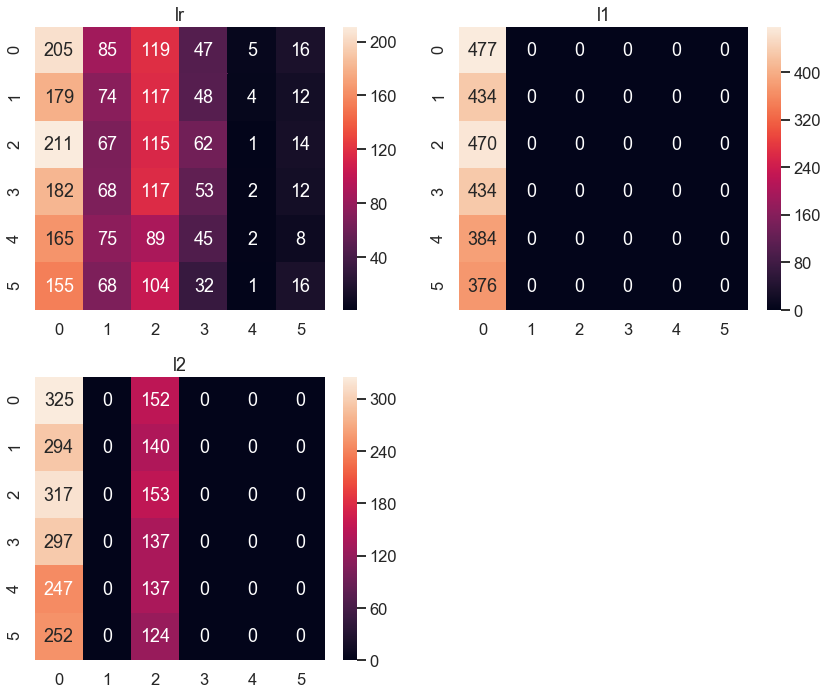

In [166]:
#plot the confusion matrix

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels_new):
    sns.heatmap(cm_new[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [196]:
# Perform a comparison of the outputs between Question 7 and 12 and give your observation
#comparision = pd.(metrics)-pd.(metrics_new)

df_metrics_new = pd.concat([metrics - metrics_new])

print(metrics)
print(metrics_new)
print(df_metrics_new)



                 lr        l1        l2
precision  0.983811  0.984784  0.983485
recall     0.983819  0.984790  0.983495
fscore     0.983811  0.984782  0.983488
accuracy   0.983819  0.984790  0.983495
auc        0.990184  0.990749  0.989983
                 lr        l1        l2
precision  0.175874  0.034315  0.067887
recall     0.180583  0.185243  0.185631
fscore     0.150576  0.057904  0.097046
accuracy   0.180583  0.185243  0.185631
auc        0.501241  0.500000  0.500785
                 lr        l1        l2
precision  0.807937  0.950470  0.915598
recall     0.803236  0.799547  0.797864
fscore     0.833235  0.926878  0.886442
accuracy   0.803236  0.799547  0.797864
auc        0.488943  0.490749  0.489198


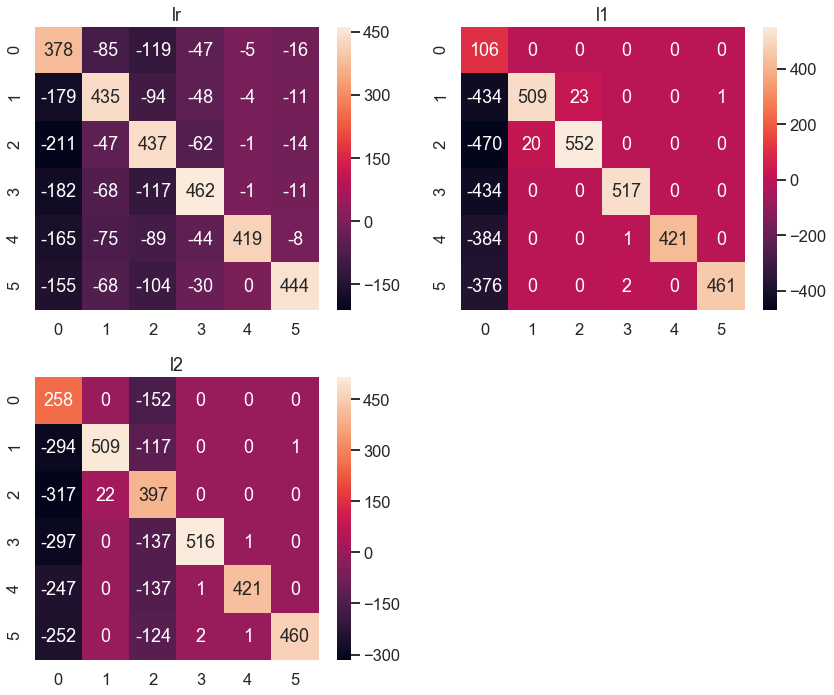

In [204]:
# Perform a comparison of the outputs between Question 8 and 13 and give your observation
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels_new):
                # creating an array of differences in cm and cm_new
    sns.heatmap(np.array(cm[lab]-cm_new[lab]), ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()